## 모델 튜닝 챌린지 : RF 하이퍼파라미터 최적화 경진대회
알고리즘 | 정형 | 하이퍼파라미터 | 모델 튜닝 | 노코딩 | AUC

https://dacon.io/competitions/official/236229/overview/description

## 1. Preparation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split, KFold, cross_val_score

import random
import os

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
SEED = 42

def seed_everything(SEED: int = SEED):
    random.seed(SEED)
    np.random.seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)

## 2. Data loading

- person_id: 유저별 고유 아이디
- Sex: 성별
- past_login_total: 과거(5월 8일 이전)에 로그인한 총 횟수
- past_1_month_login: 과거 1달간 로그인한 총 횟수
- past_1_week_login: 과거 1주간 로그인한 총 횟수
- sub_size: 과거에 데이콘 대회에서의 총 제출 수
- email_type: 가입한 이메일 종류
- phone_rat: 폰으로 접속한 비율
- apple_rat: 애플 기기로 접속한 비율
- `login`: 로그인 여부 

In [3]:
train = pd.read_csv("train.csv", index_col='person_id')

print(train.shape)
train.head(3)

(1309, 9)


,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
person_id,,,,,,,,,
0,0,3.0,1.0,1.0,0.0,0,0.000000,0.0,1
1,1,111.0,26.0,7.0,2.0,0,0.072072,0.0,1
3,1,13.0,13.0,11.0,7.0,0,0.076923,1.0,1


In [4]:
submission = pd.read_csv("sample_submission.csv")

print(submission.shape)
submission.head(3)

(1, 10)


,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,max_leaf_nodes,min_impurity_decrease,bootstrap
0,100,gini,NaN,2,1,0,auto,NaN,0,True


In [5]:
col_params = submission.columns
col_params

Index(['n_estimators', 'criterion', 'max_depth', 'min_samples_split',
       'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features',
       'max_leaf_nodes', 'min_impurity_decrease', 'bootstrap'],
      dtype='object')

## 3. Preprocessing

In [6]:
train.head(1)
train.columns

Index(['Sex', 'past_login_total', 'past_1_month_login', 'past_1_week_login',
       'sub_size', 'email_type', 'phone_rat', 'apple_rat', 'login'],
      dtype='object')

In [7]:
y = train['login']
X = train.drop(columns='login')

print(X.shape)
X.head(3)

(1309, 8)


,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat
person_id,,,,,,,,
0,0,3.0,1.0,1.0,0.0,0,0.000000,0.0
1,1,111.0,26.0,7.0,2.0,0,0.072072,0.0
3,1,13.0,13.0,11.0,7.0,0,0.076923,1.0


#### target(label) distribution

login
0    1163
1     146
Name: count, dtype: int64
login
0    0.888464
1    0.111536
Name: proportion, dtype: float64


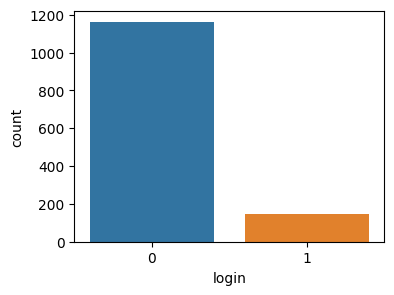

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(train, x='login')

print(train["login"].value_counts())
print(train["login"].value_counts(normalize=True))

## 4. Fitting & Evaluations(Validation )

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=SEED)

In [19]:
# Hold-out :
X_fit, X_val, y_fit, y_val = train_test_split(X, y, test_size=0.2, 
                                              stratify=y, random_state=SEED)

print(X_fit.shape, X_val.shape)
print(y_fit.shape, y_val.shape)
print(y_fit.value_counts(normalize=True), y_val.value_counts(normalize=True))

(1047, 8) (262, 8)
(1047,) (262,)
login
0    0.888252
1    0.111748
Name: proportion, dtype: float64 login
0    0.889313
1    0.110687
Name: proportion, dtype: float64


In [ ]:
# Cross val :

folds = 5
kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
l_score = []
for idx, (train_idx, test_idx) in enumerate(kfold.split(X)):

    X_fit = X.values[train_idx] 
    X_val = X.values[test_idx]
    
    y_fit = y.values[train_idx] 
    y_val = y.values[test_idx]

    rf_clf.fit(X_fit, y_fit)
    pred = rf_clf.predict(X_val)
    
    score = accuracy_score(y_val, pred)
    l_score.append(score)
    
    print(f"{folds}번 중에서 {idx+1}번째 : accuracy 는 {score} 입니다")
    
print(f"평균 accuracy : {np.mean(l_score):.4f}")    

In [91]:
p_optuna = {...}

In [92]:
rf_clf = RandomForestClassifier(**p_optuna, random_state=42)

In [ ]:
rf_clf.fit(X_fit, y_fit)

In [94]:
pred = rf_clf.predict(X_val)

In [ ]:
roc_auc_score(y_val, pred)   

## 5. Optimization : Find hyper-parameters

In [ ]:
['n_estimators', 'criterion', 'max_depth', 'min_samples_split',
'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features',
'max_leaf_nodes', 'min_impurity_decrease', 'bootstrap']

In [72]:
import optuna
from optuna.samplers import TPESampler

In [73]:
def objective(trial):
    scores = []
    
    params = {
        "n_estimators" : trial.suggest_int('n_estimators', 100, 165),
        "max_depth" : trial.suggest_int('max_depth', 8, 25),
        'criterion' : trial.suggest_categorical('criterion', ["gini","entropy","log_loss"]),
        "min_samples_split" : trial.suggest_int('min_samples_split', 2, 30),
        "min_samples_leaf" : trial.suggest_int('min_samples_leaf', 1, 10),
        "min_weight_fraction_leaf" : trial.suggest_uniform('min_weight_fraction_leaf', 0.0, 0.1),
        'max_features' : trial.suggest_categorical('max_features', ["sqrt","log2",None]),
        "max_leaf_nodes" : trial.suggest_int('max_leaf_nodes', 10, 30),
        "min_impurity_decrease" : trial.suggest_uniform('min_impurity_decrease', 0.0, 0.1),
        "bootstrap" : trial.suggest_categorical('bootstrap', [True, False])
    }
    
    rf_clf_opt = RandomForestClassifier(**params, random_state=42)
    rf_clf_opt.fit(X_fit, y_fit)
    
    pred_opt = rf_clf_opt.predict(X_val)
    score = roc_auc_score(y_val, pred_opt)
    
    scores.append(score)
    
    return np.mean(scores)

In [ ]:
sampler = TPESampler()

study = optuna.create_study(sampler=sampler,
                            direction='maximize')
study.optimize(objective, n_trials=500)

In [ ]:
print(study.best_params)
print(study.best_value)

### n_estimators

In [28]:
log_parameter = []

for n_estimators in range(100,165,1):
    rf_clf_tun = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'n_estimators: {n_estimators}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'n_estimators': n_estimators,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter)    

n_estimators: 100, AUC: 0.6961669379902323
n_estimators: 101, AUC: 0.6940210152434513
n_estimators: 102, AUC: 0.7112623945537961
n_estimators: 103, AUC: 0.7112623945537961
n_estimators: 104, AUC: 0.7112623945537961
n_estimators: 105, AUC: 0.7134083173005772
n_estimators: 106, AUC: 0.7112623945537961
n_estimators: 107, AUC: 0.6961669379902323
n_estimators: 108, AUC: 0.7134083173005772
n_estimators: 109, AUC: 0.7134083173005772
n_estimators: 110, AUC: 0.7134083173005772
n_estimators: 111, AUC: 0.7134083173005772
n_estimators: 112, AUC: 0.7134083173005772
n_estimators: 113, AUC: 0.7134083173005772
n_estimators: 114, AUC: 0.6940210152434513
n_estimators: 115, AUC: 0.6961669379902323
n_estimators: 116, AUC: 0.7134083173005772
n_estimators: 117, AUC: 0.6961669379902323
n_estimators: 118, AUC: 0.6961669379902323
n_estimators: 119, AUC: 0.6961669379902323
n_estimators: 120, AUC: 0.6961669379902323
n_estimators: 121, AUC: 0.7134083173005772
n_estimators: 122, AUC: 0.6961669379902323
n_estimator

Text(0, 0.5, 'AUC')

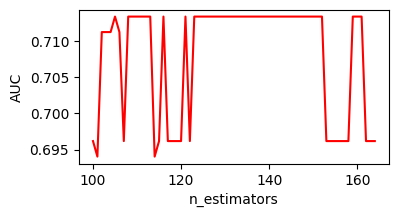

In [29]:
plt.figure(figsize=(4,2))
plt.plot(df_log["n_estimators"], df_log["AUC"], color='r')
plt.xlabel("n_estimators")
plt.ylabel("AUC")

### max_depth

In [35]:
log_parameter = []

for max_depth in range(8,25,1):
    rf_clf_tun = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'max_depth: {max_depth}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'max_depth': max_depth,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

max_depth: 8, AUC: 0.6810714814266687
max_depth: 9, AUC: 0.6638301021163239
max_depth: 10, AUC: 0.6638301021163239
max_depth: 11, AUC: 0.6616841793695427
max_depth: 12, AUC: 0.6595382566227617
max_depth: 13, AUC: 0.6767796359331065
max_depth: 14, AUC: 0.6961669379902323
max_depth: 15, AUC: 0.6767796359331065
max_depth: 16, AUC: 0.6789255586798876
max_depth: 17, AUC: 0.6767796359331065
max_depth: 18, AUC: 0.6789255586798876
max_depth: 19, AUC: 0.6961669379902323
max_depth: 20, AUC: 0.6961669379902323
max_depth: 21, AUC: 0.7134083173005772
max_depth: 22, AUC: 0.6961669379902323
max_depth: 23, AUC: 0.6961669379902323
max_depth: 24, AUC: 0.6961669379902323


Text(0, 0.5, 'AUC')

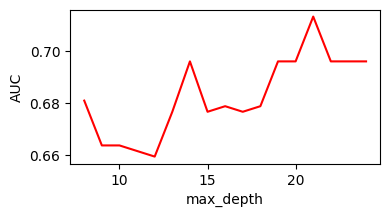

In [36]:
plt.figure(figsize=(4,2))
plt.plot(df_log["max_depth"], df_log["AUC"], color='r')
plt.xlabel("max_depth")
plt.ylabel("AUC")

### criterion

In [37]:
log_parameter = []

for criterion in ["gini","entropy","log_loss"]:
    rf_clf_tun = RandomForestClassifier(criterion=criterion, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'criterion: {criterion}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'criterion': criterion,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

criterion: gini, AUC: 0.6961669379902323
criterion: entropy, AUC: 0.7134083173005772
criterion: log_loss, AUC: 0.7134083173005772


Text(0, 0.5, 'AUC')

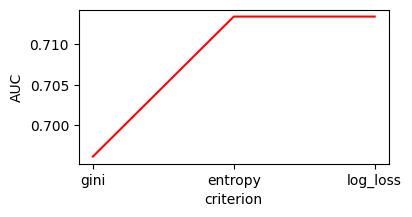

In [38]:
plt.figure(figsize=(4,2))
plt.plot(df_log["criterion"], df_log["AUC"], color='r')
plt.xlabel("criterion")
plt.ylabel("AUC")

### min_samples_split

In [43]:
log_parameter = []

for min_samples_split in range(2,30,2):
    rf_clf_tun = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'min_samples_split: {min_samples_split}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'min_samples_split': min_samples_split,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

min_samples_split: 2, AUC: 0.6961669379902323
min_samples_split: 4, AUC: 0.6789255586798876
min_samples_split: 6, AUC: 0.6789255586798876
min_samples_split: 8, AUC: 0.6638301021163239
min_samples_split: 10, AUC: 0.6810714814266687
min_samples_split: 12, AUC: 0.6810714814266687
min_samples_split: 14, AUC: 0.6638301021163239
min_samples_split: 16, AUC: 0.6638301021163239
min_samples_split: 18, AUC: 0.6638301021163239
min_samples_split: 20, AUC: 0.6638301021163239
min_samples_split: 22, AUC: 0.6638301021163239
min_samples_split: 24, AUC: 0.6810714814266687
min_samples_split: 26, AUC: 0.6832174041734498
min_samples_split: 28, AUC: 0.6659760248631049


Text(0, 0.5, 'AUC')

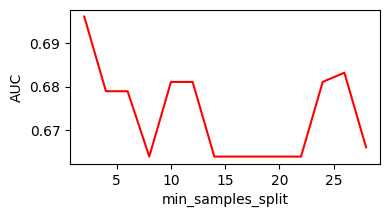

In [44]:
plt.figure(figsize=(4,2))
plt.plot(df_log["min_samples_split"], df_log["AUC"], color='r')
plt.xlabel("min_samples_split")
plt.ylabel("AUC")

### min_samples_leaf

In [45]:
log_parameter = []

for min_samples_leaf in range(1,10,1):
    rf_clf_tun = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'min_samples_leaf: {min_samples_leaf}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'min_samples_leaf': min_samples_leaf,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

min_samples_leaf: 1, AUC: 0.6961669379902323
min_samples_leaf: 2, AUC: 0.6810714814266687
min_samples_leaf: 3, AUC: 0.6659760248631049
min_samples_leaf: 4, AUC: 0.6638301021163239
min_samples_leaf: 5, AUC: 0.6659760248631049
min_samples_leaf: 6, AUC: 0.6465887228059789
min_samples_leaf: 7, AUC: 0.6487346455527601
min_samples_leaf: 8, AUC: 0.6659760248631049
min_samples_leaf: 9, AUC: 0.6465887228059789


Text(0, 0.5, 'AUC')

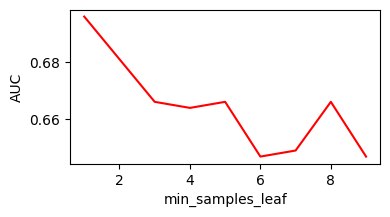

In [46]:
plt.figure(figsize=(4,2))
plt.plot(df_log["min_samples_leaf"], df_log["AUC"], color='r')
plt.xlabel("min_samples_leaf")
plt.ylabel("AUC")

### min_weight_fraction_leaf

In [53]:
log_parameter = []

for min_weight_fraction_leaf in np.arange(0,0.5,0.01):
    rf_clf_tun = RandomForestClassifier(min_weight_fraction_leaf=min_weight_fraction_leaf, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'min_weight_fraction_leaf: {min_weight_fraction_leaf}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'min_weight_fraction_leaf': min_weight_fraction_leaf,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

min_weight_fraction_leaf: 0.0, AUC: 0.6961669379902323
min_weight_fraction_leaf: 0.01, AUC: 0.6487346455527601
min_weight_fraction_leaf: 0.02, AUC: 0.6314932662424153
min_weight_fraction_leaf: 0.03, AUC: 0.6336391889891965
min_weight_fraction_leaf: 0.04, AUC: 0.6336391889891965
min_weight_fraction_leaf: 0.05, AUC: 0.5862068965517242
min_weight_fraction_leaf: 0.06, AUC: 0.5
min_weight_fraction_leaf: 0.07, AUC: 0.5
min_weight_fraction_leaf: 0.08, AUC: 0.5
min_weight_fraction_leaf: 0.09, AUC: 0.5
min_weight_fraction_leaf: 0.1, AUC: 0.5
min_weight_fraction_leaf: 0.11, AUC: 0.5
min_weight_fraction_leaf: 0.12, AUC: 0.5
min_weight_fraction_leaf: 0.13, AUC: 0.5
min_weight_fraction_leaf: 0.14, AUC: 0.5
min_weight_fraction_leaf: 0.15, AUC: 0.5
min_weight_fraction_leaf: 0.16, AUC: 0.5
min_weight_fraction_leaf: 0.17, AUC: 0.5
min_weight_fraction_leaf: 0.18, AUC: 0.5
min_weight_fraction_leaf: 0.19, AUC: 0.5
min_weight_fraction_leaf: 0.2, AUC: 0.5
min_weight_fraction_leaf: 0.21, AUC: 0.5
min_weight_

Text(0, 0.5, 'AUC')

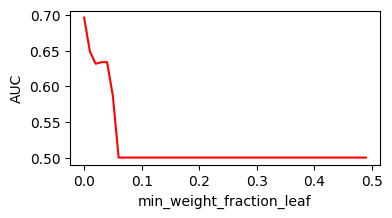

In [54]:
plt.figure(figsize=(4,2))
plt.plot(df_log["min_weight_fraction_leaf"], df_log["AUC"], color='r')
plt.xlabel("min_weight_fraction_leaf")
plt.ylabel("AUC")

### max_features

In [55]:
log_parameter = []

for max_features in ['sqrt','log2', None]:
    rf_clf_tun = RandomForestClassifier(max_features=max_features, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'max_features: {max_features}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'max_features': max_features,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

max_features: sqrt, AUC: 0.6961669379902323
max_features: log2, AUC: 0.6940210152434513
max_features: None, AUC: 0.6746337131863254


### max_leaf_nodes

In [63]:
log_parameter = []

for max_leaf_nodes in range(10,30,1):
    rf_clf_tun = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'max_leaf_nodes: {max_leaf_nodes}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'max_leaf_nodes': max_leaf_nodes,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

max_leaf_nodes: 10, AUC: 0.6314932662424153
max_leaf_nodes: 11, AUC: 0.6487346455527601
max_leaf_nodes: 12, AUC: 0.6487346455527601
max_leaf_nodes: 13, AUC: 0.6487346455527601
max_leaf_nodes: 14, AUC: 0.6487346455527601
max_leaf_nodes: 15, AUC: 0.6487346455527601
max_leaf_nodes: 16, AUC: 0.6638301021163239
max_leaf_nodes: 17, AUC: 0.6638301021163239
max_leaf_nodes: 18, AUC: 0.6638301021163239
max_leaf_nodes: 19, AUC: 0.6638301021163239
max_leaf_nodes: 20, AUC: 0.6638301021163239
max_leaf_nodes: 21, AUC: 0.6638301021163239
max_leaf_nodes: 22, AUC: 0.6638301021163239
max_leaf_nodes: 23, AUC: 0.6810714814266687
max_leaf_nodes: 24, AUC: 0.6810714814266687
max_leaf_nodes: 25, AUC: 0.6810714814266687
max_leaf_nodes: 26, AUC: 0.6810714814266687
max_leaf_nodes: 27, AUC: 0.6810714814266687
max_leaf_nodes: 28, AUC: 0.6810714814266687
max_leaf_nodes: 29, AUC: 0.6810714814266687


Text(0, 0.5, 'AUC')

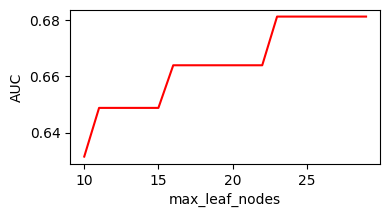

In [64]:
plt.figure(figsize=(4,2))
plt.plot(df_log["max_leaf_nodes"], df_log["AUC"], color='r')
plt.xlabel("max_leaf_nodes")
plt.ylabel("AUC")

### min_impurity_decrease

In [68]:
log_parameter = []

for min_impurity_decrease in np.arange(0,0.2,0.01):
    rf_clf_tun = RandomForestClassifier(min_impurity_decrease=min_impurity_decrease, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'min_impurity_decrease: {min_impurity_decrease}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'min_impurity_decrease': min_impurity_decrease,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

min_impurity_decrease: 0.0, AUC: 0.6961669379902323
min_impurity_decrease: 0.01, AUC: 0.5323368358739086
min_impurity_decrease: 0.02, AUC: 0.5
min_impurity_decrease: 0.03, AUC: 0.5
min_impurity_decrease: 0.04, AUC: 0.5
min_impurity_decrease: 0.05, AUC: 0.5
min_impurity_decrease: 0.06, AUC: 0.5
min_impurity_decrease: 0.07, AUC: 0.5
min_impurity_decrease: 0.08, AUC: 0.5
min_impurity_decrease: 0.09, AUC: 0.5
min_impurity_decrease: 0.1, AUC: 0.5
min_impurity_decrease: 0.11, AUC: 0.5
min_impurity_decrease: 0.12, AUC: 0.5
min_impurity_decrease: 0.13, AUC: 0.5
min_impurity_decrease: 0.14, AUC: 0.5
min_impurity_decrease: 0.15, AUC: 0.5
min_impurity_decrease: 0.16, AUC: 0.5
min_impurity_decrease: 0.17, AUC: 0.5
min_impurity_decrease: 0.18, AUC: 0.5
min_impurity_decrease: 0.19, AUC: 0.5


Text(0, 0.5, 'AUC')

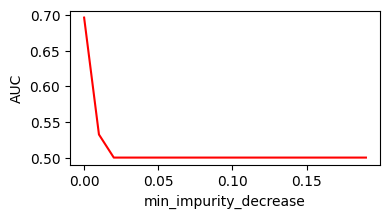

In [69]:
plt.figure(figsize=(4,2))
plt.plot(df_log["min_impurity_decrease"], df_log["AUC"], color='r')
plt.xlabel("min_impurity_decrease")
plt.ylabel("AUC")

### bootstrap

In [70]:
log_parameter = []

for bootstrap in [True, False]:
    rf_clf_tun = RandomForestClassifier(bootstrap=bootstrap, random_state=42)
    rf_clf_tun.fit(X_fit, y_fit)
    pred_tun = rf_clf_tun.predict(X_val)

    print(f'bootstrap: {bootstrap}, AUC: {roc_auc_score(y_val, pred_tun)}')
    
    log_parameter.append({'bootstrap': bootstrap,
                          "AUC": roc_auc_score(y_val, pred_tun)})
    
df_log = pd.DataFrame(log_parameter) 

bootstrap: True, AUC: 0.6961669379902323
bootstrap: False, AUC: 0.7134083173005772


## 6. Submission

In [ ]:
submission.head(1)

In [96]:
for col in submission.columns:
    submission[col] = p_optuna.get(col)
    
submission.head(1)    

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,max_leaf_nodes,min_impurity_decrease,bootstrap
0,104,log_loss,25,28,4,0.055852,None,27,0.065037,True


In [99]:
submission.to_csv("dacon-rf_tuning.csv", index=False)

---
reference
- https://dacon.io/competitions/official/236229/codeshare/9960?page=1&dtype=recent
- https://dacon.io/competitions/official/236229/codeshare/9946?page=1&dtype=recent